# Aluna: Andressa Gabrielly Macedo Marçal
## RA: 262878
### MO443/MC920

_____________________________________________________________

### imports

In [1]:
import cv2
import numpy as np
import PIL.Image

### seta pixel; imagem e shape

In [2]:
def set_pixel(im, x, y, new):
    im[x, y] = new

# Floyd e Steinberg

In [4]:
def floyd(im):  # Metodo Floyd-Steinberg
    
    w7 = 7/16.0
    w3 = 3/16.0
    w5 = 5/16.0
    w1 = 1/16.0

    for y in range(0, height-1):
        for x in range(1, width-1):
            old_pixel = im[x, y]
            if old_pixel < 128:
                new_pixel = 0
            else:
                new_pixel = 255
            set_pixel(im, x, y, new_pixel)
            quant_err = old_pixel-new_pixel
            set_pixel(im, x+1, y, im[x+1, y]+quant_err * w7)
            set_pixel(im, x-1, y+1, im[x-1, y+1] + quant_err * w3)
            set_pixel(im, x, y+1, im[x, y+1] + quant_err * w5)
            set_pixel(im, x+1, y+1, im[x+1, y+1] + quant_err * w1)

    return im

# Stevenson e Arce

In [5]:
def stevenson(im):  # Metodo de Stevenson e Arce 

    w32 = 32/200.0
    w12 = 12/200.0
    w26 = 26/200.0
    w30 = 30/200.0
    w16 = 16/200.0
    w5 = 5/200.0
    
    #pega o shape da imagem
    width, height = im.shape

    for y in range(0, height-2):
        for x in range(0, width-2):
            old_pixel = im[x, y]
            if old_pixel < 128:
                new_pixel = 0
            else:
                new_pixel = 255
            set_pixel(im, x, y, new_pixel)
            quant_err = old_pixel-new_pixel
            set_pixel(im, x+1, y, im[x+1, y] + w32 * quant_err)
            set_pixel(im, x+2, y, im[x+2, y] + w12 * quant_err)
            set_pixel(im, x-2, y+1, im[x-2, y+1] + w26 * quant_err)
            set_pixel(im, x-1, y+1, im[x-1, y+1] + w30 * quant_err)
            set_pixel(im, x, y+1, im[x, y+1] + w16 * quant_err)
            set_pixel(im, x+1, y+1, im[x+1, y+1] + w12 * quant_err)
            set_pixel(im, x+2, y+1, im[x+2, y+1] + w26 * quant_err)
            set_pixel(im, x-2, y+2, im[x-2, y+2] + w12 * quant_err)
            set_pixel(im, x-1, y+2, im[x-1, y+2] + w5 * quant_err)
            set_pixel(im, x, y+2, im[x, y+2] + w12 * quant_err)
            set_pixel(im, x+1, y+2, im[x+1, y+2] + w12 * quant_err)
            set_pixel(im, x+2, y+2, im[x+2, y+2] + w5 * quant_err)
    return im

# Burkes

In [6]:
def burkes(im):  # Metodo de Burkes

    w8 = 8/32.0
    w4 = 4/32.0
    w2 = 2/32.0
    
    width, height = im.shape

    for y in range(0, height-2):
        for x in range(0, width-2):
            old_pixel = im[x, y]
            if old_pixel < 128:
                new_pixel = 0
            else:
                new_pixel = 255
            set_pixel(im, x, y, new_pixel)
            quant_err = old_pixel-new_pixel        
            set_pixel(im, x+1, y, im[x+1, y] + w8 * quant_err)
            set_pixel(im, x+2, y, im[x+2, y] + w4 * quant_err)
            set_pixel(im, x-2, y+1, im[x-2, y+1] + w2 * quant_err)
            set_pixel(im, x-1, y+1, im[x-1, y+1] + w4 * quant_err)
            set_pixel(im, x, y+1, im[x, y+1] + w8 * quant_err)
            set_pixel(im, x+1, y+1, im[x+1, y+1] + w4 * quant_err)
            set_pixel(im, x+2, y+1, im[x+2, y+1] + w2 * quant_err)

# Sierra

In [7]:
def sierra(im):   # Metodo de Sierra 

    w5 = 5/32.0
    w4 = 4/32.0
    w3 = 3/32.0
    w2 = 2/32.0
    width, height = im.shape

    for y in range(0, height-2):
        for x in range(0, width-2):
            old_pixel = im[x, y]
            if old_pixel < 128:
                new_pixel = 0
            else:
                new_pixel = 255
            set_pixel(im, x, y, new_pixel)
            quant_err = old_pixel-new_pixel
            set_pixel(im, x+1, y, im[x+1, y] + w5 * quant_err)
            set_pixel(im, x+2, y, im[x+2, y] + w3 * quant_err)
            set_pixel(im, x-2, y+1, im[x-2, y+1] + w2 * quant_err)
            set_pixel(im, x-1, y+1, im[x-1, y+1] + w4 * quant_err)
            set_pixel(im, x, y+1, im[x, y+1] + w5 * quant_err)
            set_pixel(im, x+1, y+1, im[x+1, y+1] + w4 * quant_err)
            set_pixel(im, x+2, y+1, im[x+2, y+1] + w2 * quant_err)
            set_pixel(im, x-2, y+2, im[x-2, y+2] + w2 * quant_err)
            set_pixel(im, x-1, y+2, im[x-1, y+2] + w3 * quant_err)
            set_pixel(im, x, y+2, im[x, y+2] + w2 * quant_err)
    return im


# Stucki

In [8]:
def stucki(im):   # Metodo de Stucki
    
    w8 = 8/42.0
    w7 = 7/42.0
    w5 = 5/42.0
    w4 = 4/42.0
    w2 = 2/42.0
    w1 = 1/42.0
    width, height = im.shape
    
    for y in range(0, height-2):
        for x in range(0, width-2):
            old_pixel = im[x, y]
            if old_pixel < 128:
                new_pixel = 0
            else:
                new_pixel = 255
            set_pixel(im, x, y, new_pixel)
            quant_err = old_pixel-new_pixel
            set_pixel(im, x+1, y, im[x+1, y] + w7 * quant_err)
            set_pixel(im, x+2, y, im[x+2, y] + w5 * quant_err)
            set_pixel(im, x-2, y+1, im[x-2, y+1] + w2 * quant_err)
            set_pixel(im, x-1, y+1, im[x-1, y+1] + w4 * quant_err)
            set_pixel(im, x, y+1, im[x, y+1] + w8 * quant_err)
            set_pixel(im, x+1, y+1, im[x+1, y+1] + w4 * quant_err)
            set_pixel(im, x+2, y+1, im[x+2, y+1] + w2 * quant_err)
            set_pixel(im, x-2, y+2, im[x-2, y+2] + w1 * quant_err)
            set_pixel(im, x-1, y+2, im[x-1, y+2] + w2 * quant_err)
            set_pixel(im, x, y+2, im[x, y+2] + w4 * quant_err)
            set_pixel(im, x+1, y+2, im[x+1, y+2] + w2 * quant_err)
            set_pixel(im, x+2, y+2, im[x+2, y+2] + w1 * quant_err)
    return im


# Jarvis, Judice e Ninke

In [9]:
def jarvis(im):   # Metodo de Jarvis, Judice e Ninke

    w1 = 1/48.0
    w3 = 3/48.0
    w5 = 5/48.0
    w7 = 7/48.0
    
    width, height = im.shape
    
    for y in range(0, height-2):
        for x in range(0, width-2):
            old_pixel = im[x, y]
            if old_pixel < 128:
                new_pixel = 0
            else:
                new_pixel = 255
            set_pixel(im, x, y, new_pixel)
            quant_err = old_pixel-new_pixel
            set_pixel(im, x+1, y, im[x+1, y] + w7 * quant_err)
            set_pixel(im, x+2, y, im[x+2, y] + w5 * quant_err)
            set_pixel(im, x-2, y+1, im[x-2, y+1] + w3 * quant_err)
            set_pixel(im, x-1, y+1, im[x-1, y+1] + w5 * quant_err)
            set_pixel(im, x, y+1, im[x, y+1] + w7 * quant_err)
            set_pixel(im, x+1, y+1, im[x+1, y+1] + w5 * quant_err)
            set_pixel(im, x+2, y+1, im[x+2, y+1] + w3 * quant_err)
            set_pixel(im, x-2, y+2, im[x-2, y+2] + w1 * quant_err)
            set_pixel(im, x-1, y+2, im[x-1, y+2] + w3 * quant_err)
            set_pixel(im, x, y+2, im[x, y+2] + w5 * quant_err)
            set_pixel(im, x+1, y+2, im[x+1, y+2] + w3 * quant_err)
            set_pixel(im, x+2, y+2, im[x+2, y+2] + w1 * quant_err)
    return im


_________________________________

## Transformação de [RGB] e [GRAY] do Algoritmo [Floyd e Steinberg]

In [10]:
# adicione o caminho para acessar a imagem
img = cv2.imread("/home/andressa/Documentos/testes/input/baboon.png")

img2 = img.copy()
width, height, z = img.shape
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transforma em tons de cinza

blue = img[:, :, 0]  # pega o canal azul
blue = floyd(blue)

green = img[:, :, 1] #pega canal verde
green = floyd(green)

red = img[:, :, 2] #pega canal vermelho
red = floyd(red)

image = cv2.merge((blue, green, red))  #mesclando os 3 canais de cores (R,G,B)

gray2 = floyd(gray) #aplica filtro com pontilhado em tons de cinza



(512, 512, 3)


### [EXIBIÇÃO]  
#### FLOYD - GRAY

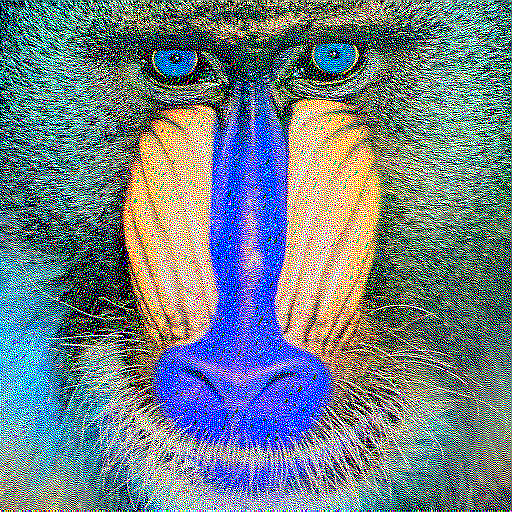

In [11]:
PIL.Image.fromarray(image)

### [EXIBIÇÃO] 
#### FLOYD - RGB

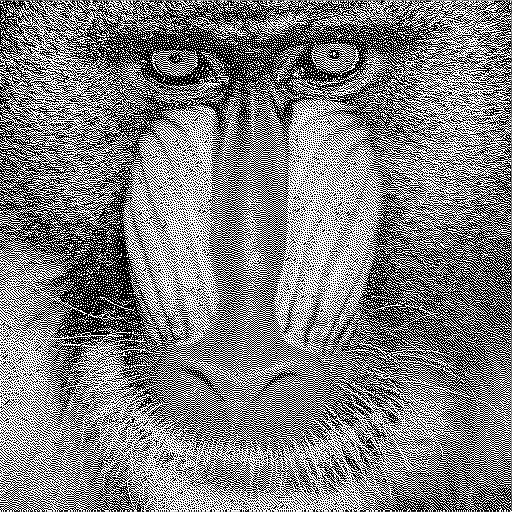

In [12]:
PIL.Image.fromarray(gray2)

# OBS:

### Notei que a exibição em cores não é a mesma executada pelo script via terminal, por gentileza, testar para averiguar o fato.

____________________________________

## Transformação de [RGB] e [GRAY] do Algoritmo [Stevenson e Arce]

In [13]:
# adicione o caminho para acessar a imagem
img = cv2.imread("/home/andressa/Documentos/testes/input/baboon.png")

img2 = img.copy()
width, height, z = img.shape
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transforma em tons de cinza

blue = img[:, :, 0]  # pega o canal azul
blue = stevenson(blue)

green = img[:, :, 1] #pega canal verde
green = stevenson(green)

red = img[:, :, 2] #pega canal vermelho
red = stevenson(red)

image = cv2.merge((blue, green, red))  #mesclando os 3 canais de cores (R,G,B)

gray2 = stevenson(gray) #aplica filtro com pontilhado em tons de cinza



(512, 512, 3)


### [EXIBIÇÃO] 
#### STEVENSON - RBG

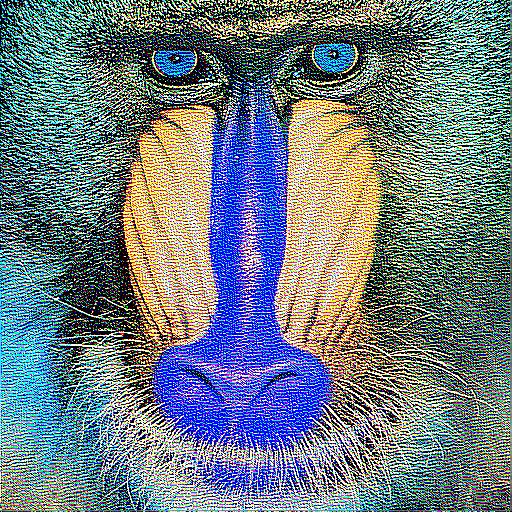

In [14]:
PIL.Image.fromarray(image)

### [EXIBIÇÃO] 
#### STEVENSON - GRAY

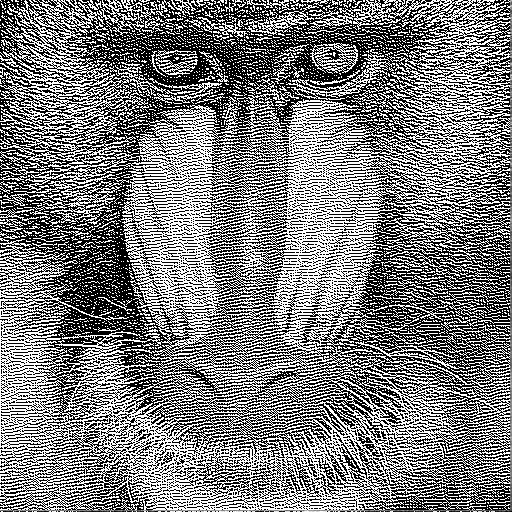

In [15]:
PIL.Image.fromarray(gray2)

# OBS:

### Notei que a exibição em cores não é a mesma executada pelo script via terminal, por gentileza, testar para averiguar o fato.

________________________________________

## Transformação de [RGB] e [GRAY] do [Algoritmo Burkes]


In [16]:
# adicione o caminho para acessar a imagem
img = cv2.imread("/home/andressa/Documentos/testes/input/baboon.png")

img2 = img.copy()
width, height, z = img.shape
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transforma em tons de cinza

blue = img[:, :, 0]  # pega o canal azul
blue = burkes(blue)

green = img[:, :, 1] #pega canal verde
green = burkes(green)

red = img[:, :, 2] #pega canal vermelho
red = burkes(red)

image = cv2.merge((blue, green, red))  #mesclando os 3 canais de cores (R,G,B)

gray2 = burkes(gray) #aplica filtro com pontilhado em tons de cinza

(512, 512, 3)


### [EXIBIÇÃO] 
#### BURKES -  RGB

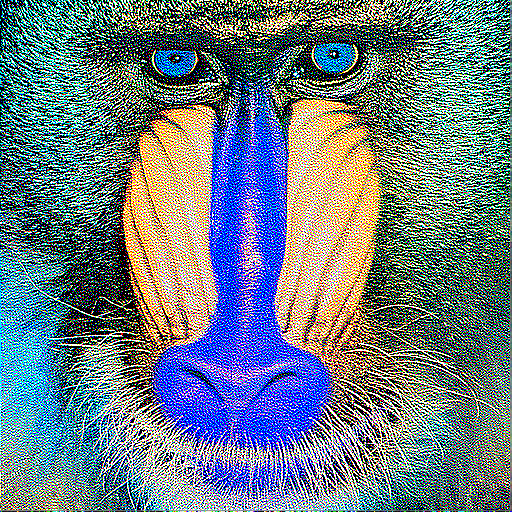

In [56]:
PIL.Image.fromarray(image)

### [EXIBIÇÃO] 
#### BURKES - GRAY

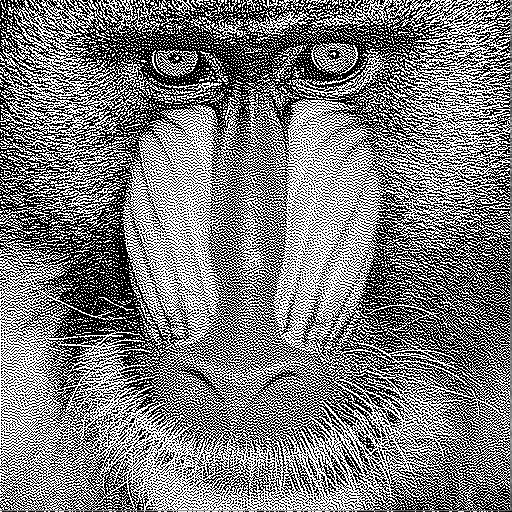

In [61]:
PIL.Image.fromarray(gray2)

____________________________________________

# OBS:

### Notei que a exibição em cores não é a mesma executada pelo script via terminal, por gentileza, testar para averiguar o fato.

____________________________________________

## Transformação de [RGB] e [GRAY] do Algoritmo [Sierra]


In [20]:
# adicione o caminho para acessar a imagem
img = cv2.imread("/home/andressa/Documentos/testes/input/baboon.png")

img2 = img.copy()
width, height, z = img.shape
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transforma em tons de cinza

blue = img[:, :, 0]  # pega o canal azul
blue = sierra(blue)

green = img[:, :, 1] #pega canal verde
green = sierra(green)

red = img[:, :, 2] #pega canal vermelho
red = sierra(red)

image = cv2.merge((blue, green, red))  #mesclando os 3 canais de cores (R,G,B)

gray2 = sierra(gray) #aplica filtro com pontilhado em tons de cinza

(512, 512, 3)


### [EXIBIÇÃO] 
#### SIERRA - RGB

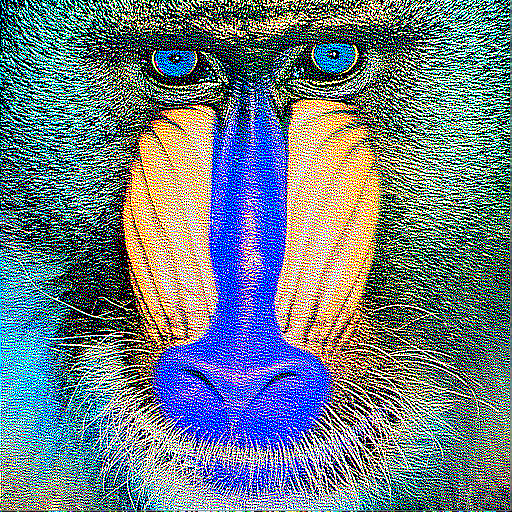

In [21]:
PIL.Image.fromarray(image)

### [EXIBIÇÃO] 
#### SIERRA - GRAY

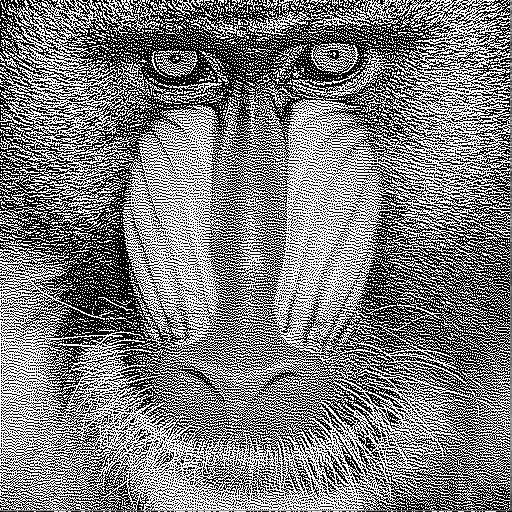

In [22]:
PIL.Image.fromarray(gray2)

____________________________________________

# OBS:

### Notei que a exibição em cores não é a mesma executada pelo script via terminal, por gentileza, testar para averiguar o fato.

____________________________________________

## Transformação de [RGB] e [GRAY] do Algoritmo [Stucki]


In [50]:
# adicione o caminho para acessar a imagem
img = cv2.imread("/home/andressa/Documentos/testes/input/baboon.png")

img2 = img.copy()
width, height, z = img.shape
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transforma em tons de cinza

blue = img[:, :, 0]  # pega o canal azul
blue = stucki(blue)

green = img[:, :, 1] #pega canal verde
green = stucki(green)

red = img[:, :, 2] #pega canal vermelho
red = stucki(red)

image = cv2.merge((blue, green, red))  #mesclando os 3 canais de cores (R,G,B)

gray2 = stucki(gray) #aplica filtro com pontilhado em tons de cinza

(512, 512, 3)


### [EXIBIÇÃO] 

#### STUCKI - RGB

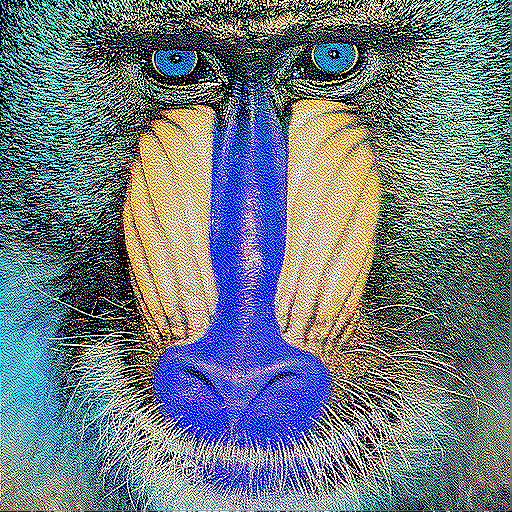

In [51]:
PIL.Image.fromarray(image)

### [EXIBIÇÃO] 

#### STUCKI - GRAY

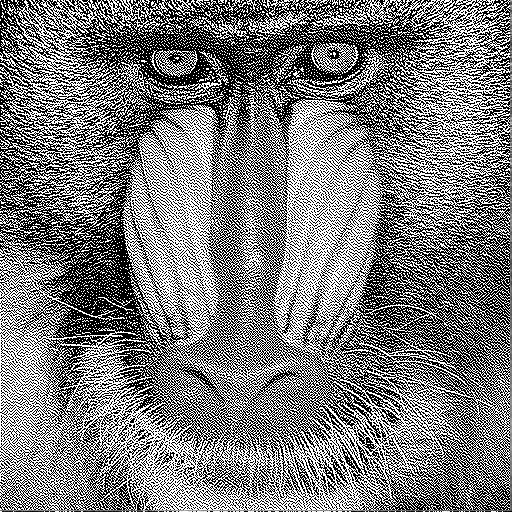

In [52]:
PIL.Image.fromarray(gray2)

____________________________________________

# OBS:

### Notei que a exibição em cores não é a mesma executada pelo script via terminal, por gentileza, testar para averiguar o fato.

_________________________________________

## Transformação de [RGB] e [GRAY] do Algoritmo [Jarvis]

In [62]:
# adicione o caminho para acessar a imagem
img = cv2.imread("/home/andressa/Documentos/testes/input/baboon.png")

img2 = img.copy()
width, height, z = img.shape
print(img.shape)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transforma em tons de cinza

blue = img[:, :, 0]  # pega o canal azul
blue = jarvis(blue)

green = img[:, :, 1] #pega canal verde
green = jarvis(green)

red = img[:, :, 2] #pega canal vermelho
red = jarvis(red)

image = cv2.merge((blue, green, red))  #mesclando os 3 canais de cores (R,G,B)

gray2 = jarvis(gray) #aplica filtro com pontilhado em tons de cinza

(512, 512, 3)


### [EXIBIÇÃO] 

#### JARVIS - RGB

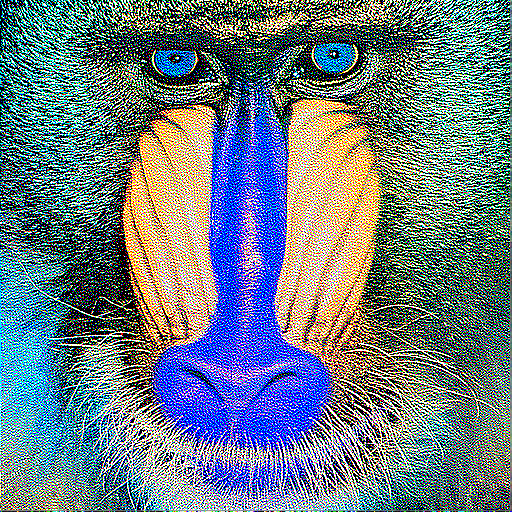

In [63]:
PIL.Image.fromarray(image)

### [EXIBIÇÃO] 

#### JARVIS - GRAY

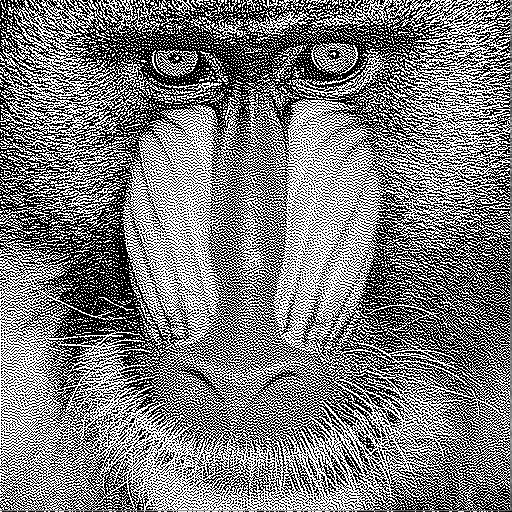

In [64]:
PIL.Image.fromarray(gray2)

____________________________________________

# OBS:

## Notei que a exibição em cores não é a mesma executada pelo script via terminal, por gentileza, testar para averiguar o fato. Está com uma exibição mais saturada visualizando pelo notebook. 

## Ver resultados no diretório Output, também estará mais perceptível com as abordagens pedidas no trabalho.

____________________________________________